# **Aviakompaniya Yo‘lovchilarining Qoniqishi**

![airplane](https://avatars.dzeninfra.ru/get-zen_doc/5236792/pub_629bc5119cd04c7f1c3792cd_629bc55053fa4d0327e75e06/scale_1200)

---

## Business Understanding

- **Amerika Qo'shma Shtatlaridagi parvozlarga nisbatan yo'lovchilarning fikri haqida ma'lumotlar berilgan. Ushbu ma'lumotlardan foydalangan holda yo'lovchilarning qoniqishlarini bashorat qilish.**

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

sns.set_theme(style='darkgrid', palette='muted')

In [2]:
train = pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv")
test = pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv")
sample_sub = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv")

## Exploratory Data Analysis

**Maʼlumotlar toʻplami tarkibi:**

- **`Gender:`** Yo'lovchilarning jinsi (ayol, erkak)
- **`Customer Type:`** Mijoz turi (sodiq mijoz, ishonchsiz mijoz)
- **`Age:`** Yo'lovchilarning haqiqiy yoshi
- **`Type of Travel:`** Yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)
- **`Class:`** Yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)
- **`Flight distance:`** Ushbu sayohatning parvoz masofasi
- **`Inflight wifi service:`** Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)
- **`Departure/Arrival time convenient:`** Ketish/Kelish vaqtining qoniqish darajasi
- **`Ease of Online booking:`** Onlayn bron qilishdan qoniqish darajasi
- **`Gate location:`** Darvoza joylashuvidan qoniqish darajasi
- **`Food and drink:`** Oziq-ovqat va ichimlikdan qoniqish darajasi
- **`Online boarding:`** Onlayn bortdan qoniqish darajasi
- **`Seat comfort:`** O'rindiqning qulayligidan qoniqish darajasi
- **`Inflight entertainment:`** Parvoz ichidagi o'yin-kulgidan qoniqish darajasi
- **`On-board service:`** Bort xizmatidan qoniqish darajasi
- **`Leg room service:`** Oyoq xonasi xizmatidan qoniqish darajasi
- **`Baggage handling:`** Bagajni tashishdan qoniqish darajasi
- **`Check-in service:`** Ro'yxatdan o'tish xizmatidan qoniqish darajasi
- **`Inflight service:`** Parvoz ichidagi xizmatdan qoniqish darajasi
- **`Cleanliness:`** Tozalikdan qoniqish darajasi
- **`Departure Delay in Minutes:`** Jo‘nash vaqtida kechikish daqiqalari
- **`Arrival Delay in Minutes:`** Yetib kelganda kechikish daqiqalari
- **`Satisfaction:`** Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Age,10000.0,39.375100,14.897959,7.0,27.00,40.0,51.00,80.0
Flight Distance,10000.0,1229.556200,1022.281958,31.0,421.00,863.5,1806.75,4983.0
Inflight wifi service,10000.0,2.780200,1.362745,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,10000.0,3.065100,1.527316,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,10000.0,2.797800,1.421168,0.0,2.00,3.0,4.00,5.0
Gate location,10000.0,2.981000,1.283278,1.0,2.00,3.0,4.00,5.0
Food and drink,10000.0,3.214500,1.333217,0.0,2.00,3.0,4.00,5.0
Online boarding,10000.0,3.349100,1.352779,0.0,2.00,4.0,4.00,5.0
Seat comfort,10000.0,3.491400,1.311220,0.0,3.00,4.0,5.00,5.0


- `Flight Distance`, `Departure Delay in Minutes` va `Arrival Delay in Minutes` ustunlari noodatiy (outlier) qiymatlarga ega.

### Visualization

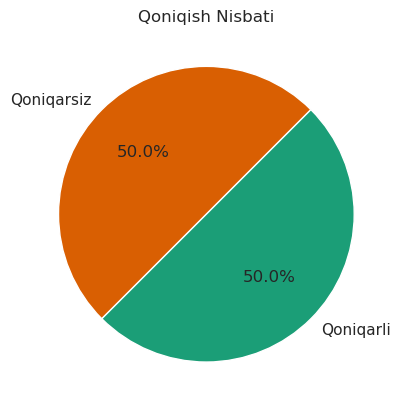

In [8]:
plt.pie(x=train['satisfaction'].value_counts(),
        labels=['Qoniqarsiz', 'Qoniqarli'],
        colors=['#d95f02', '#1b9e77'],
        autopct='%1.1f%%',
        startangle=45
)
plt.title("Qoniqish Nisbati");

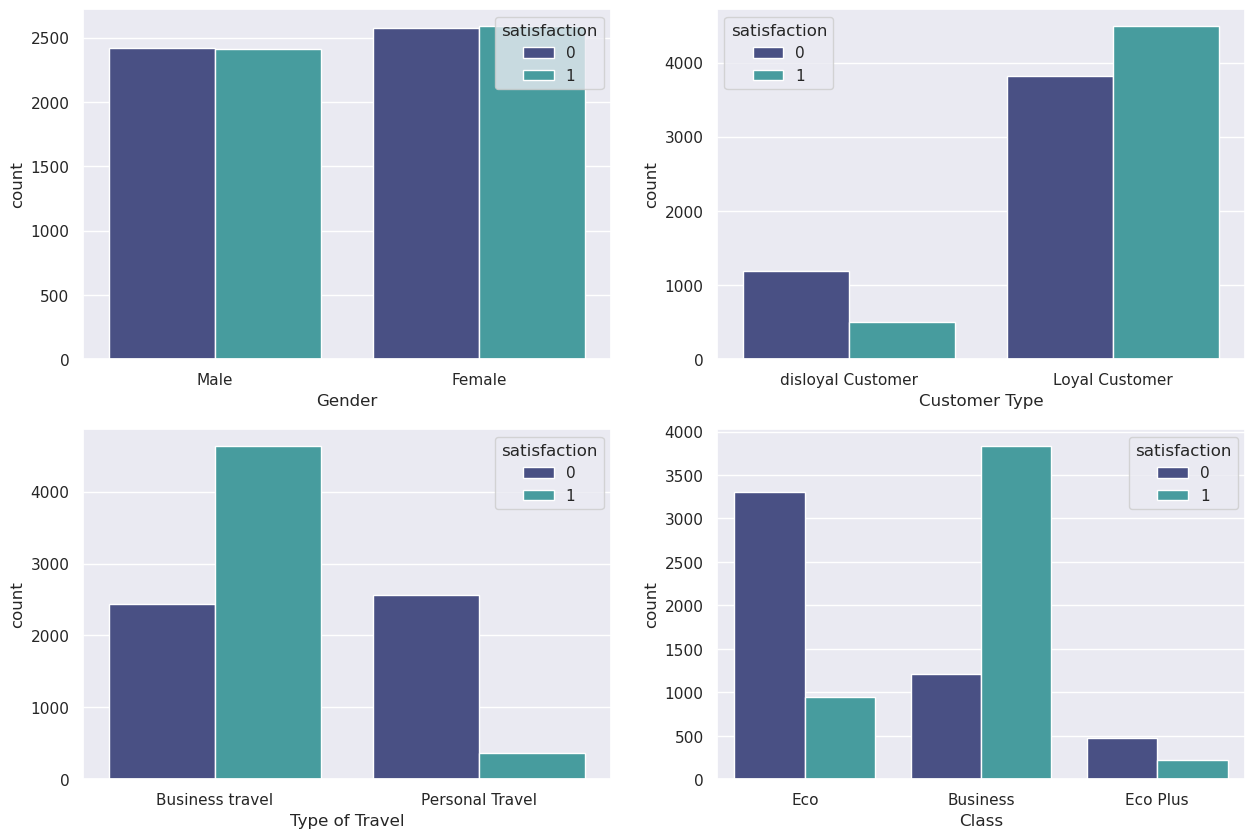

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=train, x='Gender', hue='satisfaction', palette='mako', ax=axes[0, 0])
sns.countplot(data=train, x='Customer Type', hue='satisfaction', palette='mako', ax=axes[0, 1])
sns.countplot(data=train, x='Type of Travel', hue='satisfaction', palette='mako', ax=axes[1, 0])
sns.countplot(data=train, x='Class', hue='satisfaction', palette='mako', ax=axes[1, 1])

plt.show()

## Data Preprocessing

### Outliers

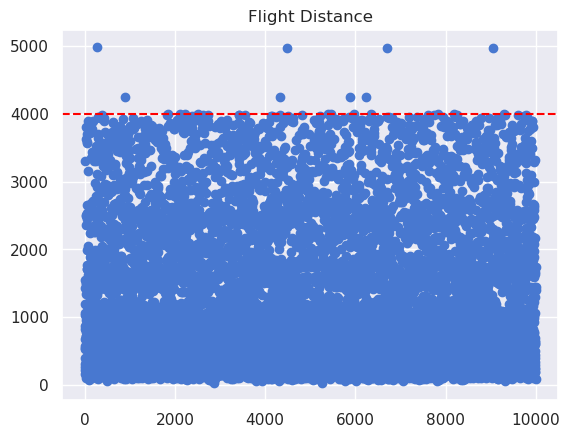

In [10]:
plt.scatter(x=train.index, y=train['Flight Distance'])
plt.axhline(y=4000, color='red', linestyle='--')
plt.title('Flight Distance');

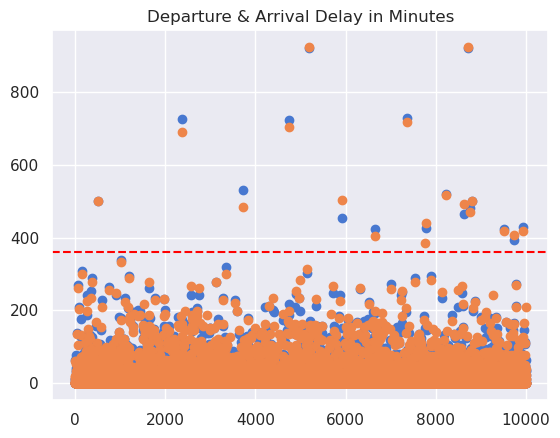

In [11]:
plt.scatter(x=train.index, y=train['Departure Delay in Minutes'])
plt.scatter(x=train.index, y=train['Arrival Delay in Minutes'])

plt.axhline(y=360, color='red', linestyle='--')
plt.title('Departure & Arrival Delay in Minutes');

In [12]:
out_mask = (train['Flight Distance']>4000) | (train['Departure Delay in Minutes']>360) | (
        train['Arrival Delay in Minutes']>360)
out_num = train[out_mask].shape[0]
rows = train.shape[0]
print(f"Outliers: {round(out_num / rows * 100, 1)}% ({out_num}/{rows})")

Outliers: 0.3% (26/10000)


- `Flight Distance` ustuni uchun `4000` dan katta noodatiy qiymatlarni, `Departure Delay in Minutes` va `Arrival Delay in Minutes` ustunlari uchun `360` dan katta noodatiy qiymatlarni tashlab yuboramiz. Jami: 26 qator (10 000 dan).

### Missing Values

In [13]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [14]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [15]:
train[['Arrival Delay in Minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Arrival Delay in Minutes,9972.0,14.709888,40.046355,0.0,0.0,0.0,12.0,924.0


- `Arrival Delay in Minutes` ustunidagi yetishmayotgan qiymatlarni o'rtacha (mean) qiymatlar bilan to'ldiramiz.

### Categorical Values

In [16]:
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    print(train[col].value_counts())
    print("=" * 42)

Female    5169
Male      4831
Name: Gender, dtype: int64
Loyal Customer       8307
disloyal Customer    1693
Name: Customer Type, dtype: int64
Business travel    7079
Personal Travel    2921
Name: Type of Travel, dtype: int64
Business    5048
Eco         4251
Eco Plus     701
Name: Class, dtype: int64


- Kategorik ustunlarga `OrdinalEncoding` qo'llaymiz.

In [17]:
def data_preprocessor(df):
    df = df.copy()

    # Remove unnecessary columns
    df = df.drop(columns=['id'])
    
    # Outliers
    out_mask = (df['Flight Distance']>4000) | (df['Departure Delay in Minutes']>360) | (
                df['Arrival Delay in Minutes']>360)
    df = df.drop(df[out_mask].index).reset_index(drop=True)

    # Missing Values
    miss_col = ['Arrival Delay in Minutes']
    df[miss_col] = SimpleImputer(strategy='mean').fit_transform(df[miss_col])
    
    # Categorical Values
    cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
    df[cat_cols] = OrdinalEncoder().fit_transform(df[cat_cols])

    # Normalization
    df[df.columns] = MinMaxScaler().fit_transform(df[df.columns])

    return df

In [18]:
train_processed = data_preprocessor(train)

# Split train set
X_train, X_val = train_test_split(train_processed, test_size=0.2, random_state=42)
X_train, y_train = X_train.drop(columns=['satisfaction']), X_train['satisfaction']
X_val, y_val = X_val.drop(columns=['satisfaction']), X_val['satisfaction']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7979, 22), (7979,), (1995, 22), (1995,))

In [19]:
# Correlation between features and the target
X_train.corrwith(y_train).abs().sort_values(ascending=False)

Online boarding                      0.512314
Type of Travel                       0.483554
Class                                0.470164
Inflight entertainment               0.397932
Seat comfort                         0.343023
Leg room service                     0.328943
On-board service                     0.325165
Cleanliness                          0.306990
Flight Distance                      0.301054
Inflight wifi service                0.277837
Baggage handling                     0.247657
Inflight service                     0.239312
Checkin service                      0.232144
Food and drink                       0.202614
Customer Type                        0.179858
Ease of Online booking               0.163183
Age                                  0.140667
Departure/Arrival time convenient    0.068560
Arrival Delay in Minutes             0.061678
Departure Delay in Minutes           0.055930
Gate location                        0.006262
Gender                            

## Modeling

### Decision Tree

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       944
         1.0       0.94      0.92      0.93      1051

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995



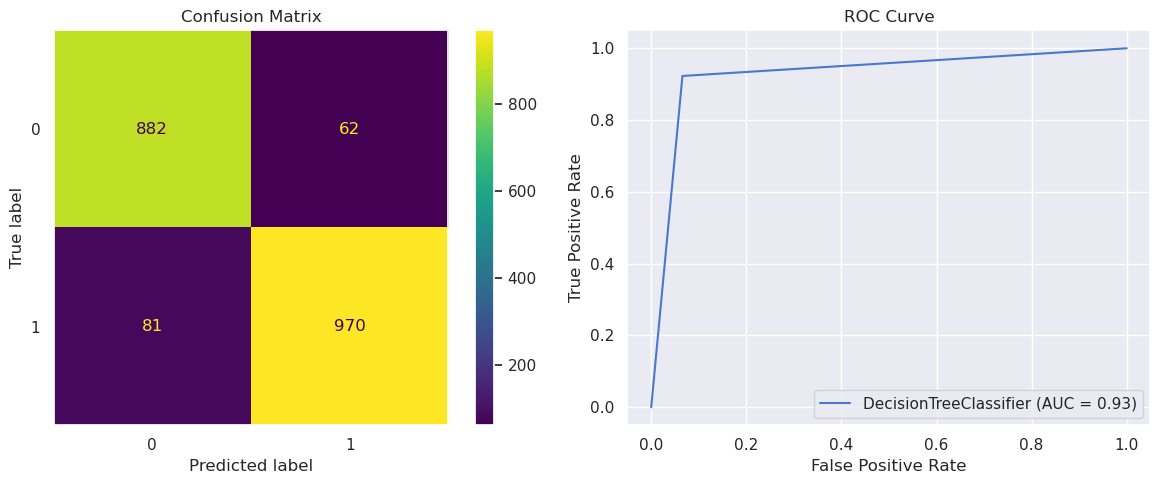

In [20]:
# Model Traning
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Model Score
y_pred = tree.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='DecisionTreeClassifier').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

### Random Forest

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       944
         1.0       0.97      0.93      0.95      1051

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995



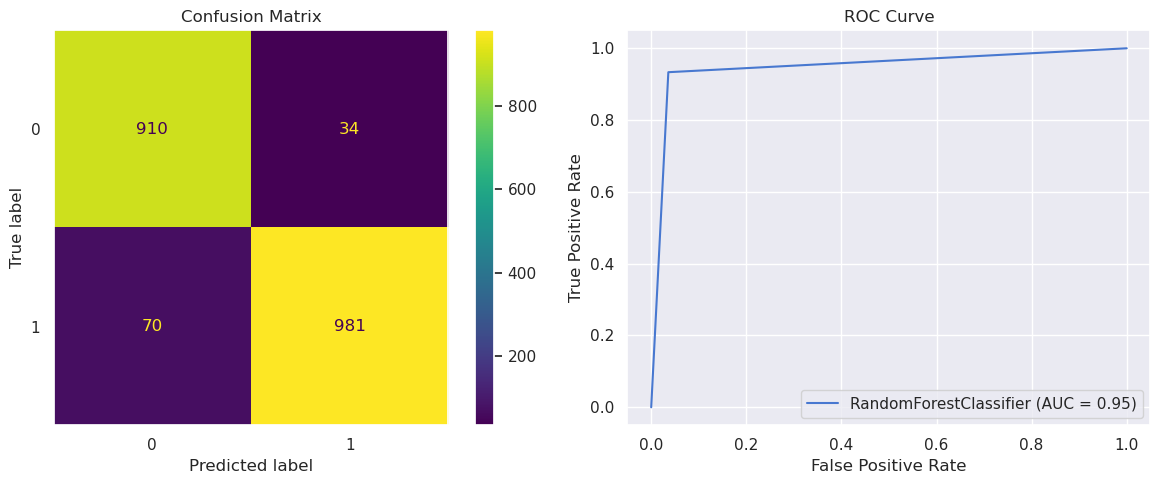

In [21]:
# Model Traning
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Model Score
y_pred = rfc.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='RandomForestClassifier').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

### K-NN (K-Nearest Neighbors)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90       944
         1.0       0.95      0.85      0.90      1051

    accuracy                           0.90      1995
   macro avg       0.90      0.90      0.90      1995
weighted avg       0.90      0.90      0.90      1995



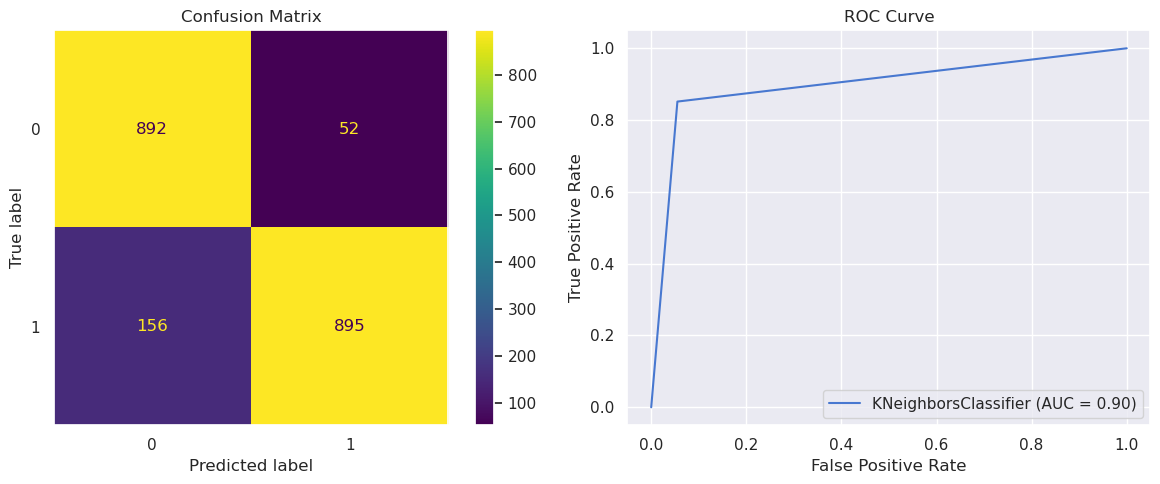

In [22]:
# Model Traning
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Model Score
y_pred = knn.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='KNeighborsClassifier').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

###  Logistic Regression

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       944
         1.0       0.89      0.85      0.87      1051

    accuracy                           0.87      1995
   macro avg       0.87      0.87      0.87      1995
weighted avg       0.87      0.87      0.87      1995



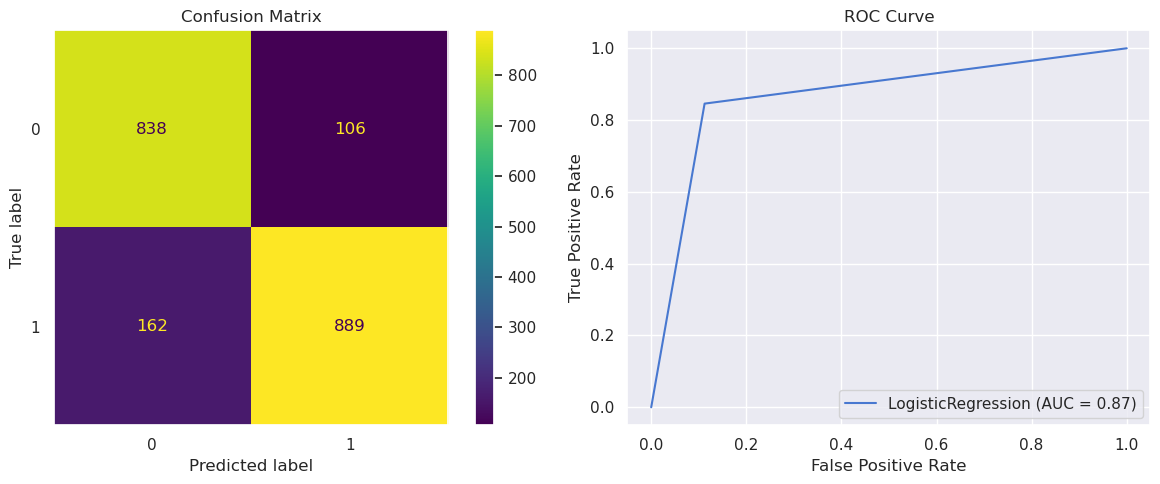

In [23]:
# Model Traning
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

# Model Score
y_pred = lgreg.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='LogisticRegression').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

### Support Vector Machine

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       944
         1.0       0.96      0.91      0.93      1051

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995



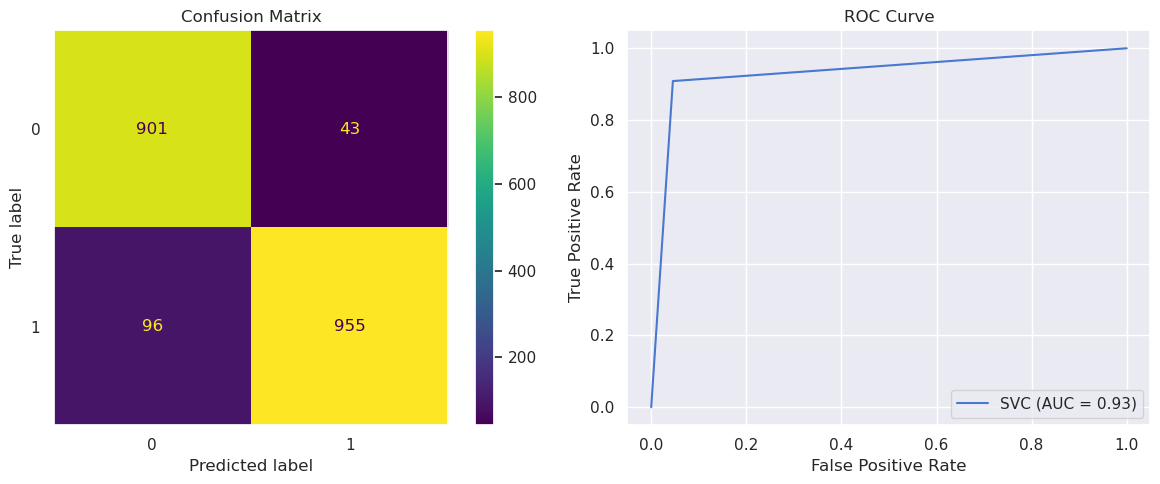

In [24]:
# Model Traning
svc = SVC()
svc.fit(X_train, y_train)

# Model Score
y_pred = svc.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='SVC').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

### XGBoost (Extreme Gradient Boosting)

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       944
         1.0       0.97      0.94      0.96      1051

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995



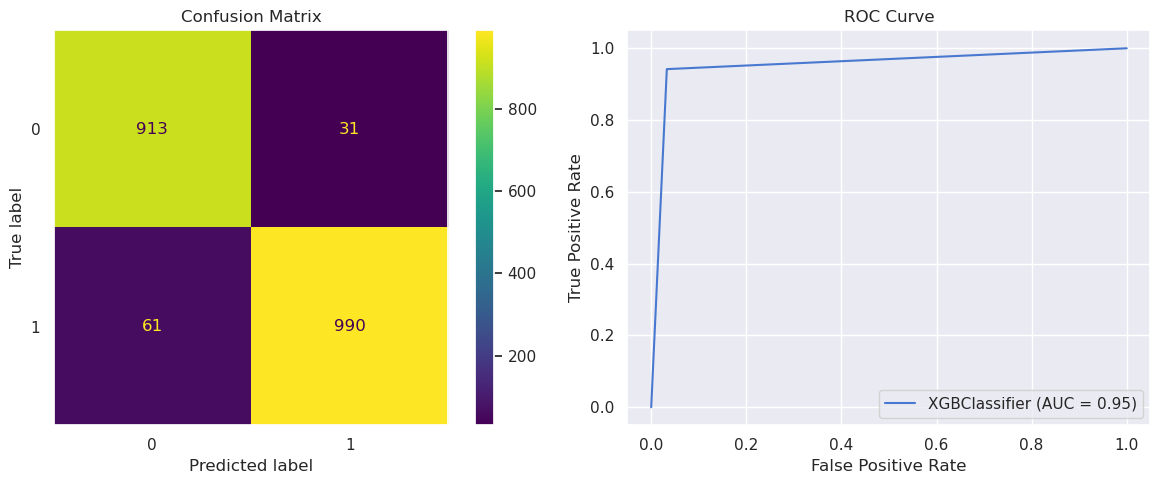

In [25]:
# Model Traning
xgb_c = XGBClassifier()
xgb_c.fit(X_train, y_train)

# Model Score
y_pred = xgb_c.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
metrics.ConfusionMatrixDisplay(conf_mat).plot(ax=ax1)
ax1.grid(visible=False)
ax1.set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr),
                        estimator_name='XGBClassifier').plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.tight_layout()
plt.show()

### Hyperparameter tuning

In [26]:
# start_time = time.time()

# models_params = {
#     XGBClassifier(n_jobs=-1):{
#         'n_estimators': [150, 250, 350],
#         'max_depth': [3, 7, 10],
#         'max_leaves': [0, 3, 5],
#         'learning_rate': [1, 2, 3]},
#     RandomForestClassifier(n_jobs=-1):{
#         'n_estimators': [150, 250, 350],
#         'max_depth': [None, 3, 7, 10],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 3],
#         'max_features': [1.0, 'sqrt', 'log2']},
#     DecisionTreeClassifier():{
#         'max_depth': [None, 3, 7, 10],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 3],
#         'max_features': [None, 'sqrt', 'log2']},
#     KNeighborsClassifier():{
#         'n_neighbors': list(range(1, 16)),
#         'weights': [None, 'uniform', 'distance']
#     }
# }

# for model, param_grid in models_params.items():
#     grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=param_grid,
#         scoring='roc_auc',
#         cv=10,
#         n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     best_params = grid_search.best_params_
#     print("Model:", model.__class__.__name__)
#     print("Best Hyperparameters:", best_params)
#     print("=" * 42)

# # Display execution time
# end_time = time.time()
# execution_time = end_time - start_time
# hours = int(execution_time // 3600)
# minutes = int((execution_time % 3600) // 60)
# seconds = int(execution_time % 60)
# print(f"Execution Time: {hours}h {minutes}m {seconds}s")

**GridSearchCV results:**

Model: XGBClassifier  \
Best Hyperparameters: {'learning_rate': 1, 'max_depth': 7, 'max_leaves': 0, 'n_estimators': 150}

**==========================================**

Model: RandomForestClassifier  \
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}

**==========================================**

Model: DecisionTreeClassifier  \
Best Hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6}

**==========================================**

Model: KNeighborsClassifier  \
Best Hyperparameters: {'n_neighbors': 15, 'weights': 'distance'}

**==========================================**

Execution Time: 1h 12m 12s

### Cross-validation

In [27]:
# Split train & test set
X_train, y_train = train_processed.drop('satisfaction', axis=1), train_processed['satisfaction']
X_test = data_preprocessor(test)

X_train.shape, y_train.shape, X_test.shape

((9974, 22), (9974,), (3990, 22))

In [28]:
X_train.corrwith(y_train).abs().sort_values(ascending=False)

Online boarding                      0.505259
Type of Travel                       0.481963
Class                                0.463024
Inflight entertainment               0.401880
Seat comfort                         0.342454
On-board service                     0.327826
Leg room service                     0.325442
Cleanliness                          0.310385
Flight Distance                      0.299348
Inflight wifi service                0.277964
Baggage handling                     0.247607
Inflight service                     0.240855
Checkin service                      0.232210
Food and drink                       0.206998
Customer Type                        0.181247
Ease of Online booking               0.165205
Age                                  0.144278
Departure/Arrival time convenient    0.066667
Arrival Delay in Minutes             0.060663
Departure Delay in Minutes           0.052905
Gate location                        0.007731
Gender                            

In [29]:
# K-Fold Cross Validation
models = [DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]
trained_models = {}
models_test_preds = pd.DataFrame()
# models_scores = pd.DataFrame(columns=['Accuracy', 'Precision', 'AUC'])
models_scores = pd.DataFrame(columns=['AUC'])

kf = KFold(n_splits=10, shuffle=True, random_state=42)
for model in models:
    fold_predictions = []  # Store predictions for each fold
    # Store evaluation metrics:
    acc_scores = []
    prec_scores = []
    auc_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X = X_train.loc[train_idx]
        y = y_train.loc[train_idx]
        X_val = X_train.loc[val_idx]
        y_val = y_train.loc[val_idx]

        model.fit(X, y)
#         test_pred = model.predict(X_test)
        test_pred = model.predict_proba(X_test)[:, 1]  # get predicted probabilities of the positive class
        fold_predictions.append(test_pred)

#         y_pred = model.predict(X_val)
        y_pred = model.predict_proba(X_val)[:, 1]
#         acc_scores.append(metrics.accuracy_score(y_val, y_pred))
#         prec_scores.append(metrics.precision_score(y_val, y_pred))
        auc_scores.append(metrics.roc_auc_score(y_val, y_pred))

    # Store the trained model
    model_name = model.__class__.__name__
    trained_models[model_name] = model
    
    # Calculate the average of predictions across all folds
    models_test_preds[model_name] = np.array(fold_predictions).mean(axis=0)
    
    # Store evaluation metrics of the model
    models_scores.loc[model_name] = {
#         'Accuracy': np.mean(acc_scores),
#         'Precision': np.mean(prec_scores),
        'AUC': np.mean(auc_scores)
    }

    # Print the evaluation metrics
    print("Model:", model_name)
#     print("Accuracy:", models_scores.loc[model_name, 'Accuracy'])
    print("AUC:", models_scores.loc[model_name, 'AUC'])
    print("=" * 42)

Model: DecisionTreeClassifier
AUC: 0.9303247327271441
Model: RandomForestClassifier
AUC: 0.9903044509277524
Model: XGBClassifier
AUC: 0.9926696053728614


In [30]:
trained_models

{'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

## Evaluation

In [31]:
models_scores.sort_values('AUC', ascending=False)

,AUC
XGBClassifier,0.992670
RandomForestClassifier,0.990304
DecisionTreeClassifier,0.930325


**BEST SCORE:** *XGBClassifier*, `AUC = 0.99267`

### Submission

In [32]:
models_test_preds.head()

,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
0,0.0,0.088,0.000229
1,0.0,0.200,0.444341
2,1.0,0.999,0.999867
3,1.0,0.783,0.999249
4,0.3,0.325,0.279169


In [33]:
sample_sub.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [34]:
xgb_preds = models_test_preds['XGBClassifier']
sample_sub['satisfaction'] = xgb_preds
sample_sub.to_csv("xgb_preds.csv", index=False)

In [35]:
pd.read_csv("/kaggle/working/xgb_preds.csv").head()

,id,satisfaction
0,1,0.000229
1,2,0.444341
2,3,0.999867
3,4,0.999249
4,5,0.279169
